In [ ]:
# SETUP AND IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading and splitting data

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Split training data into training and validation sets
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (50000, 28, 28)
Validation data shape: (10000, 28, 28)
Test data shape: (10000, 28, 28)


## Basic Data Exploration and Visualizations

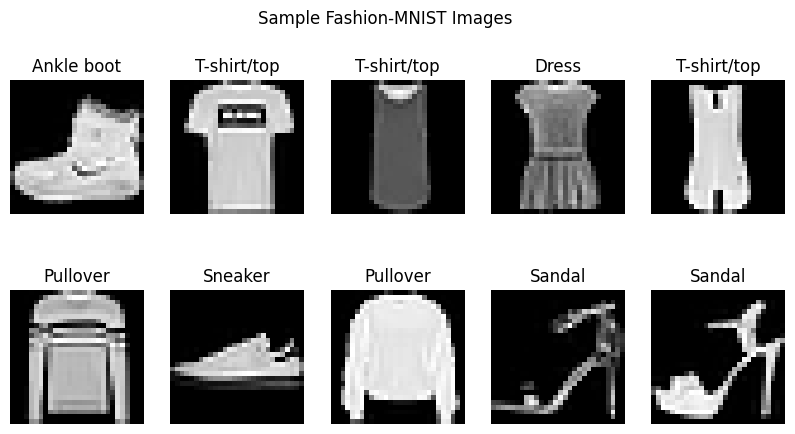

In [ ]:
# Display few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Fashion-MNIST Images")
plt.show()

/tmp/ipython-input-4006892902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


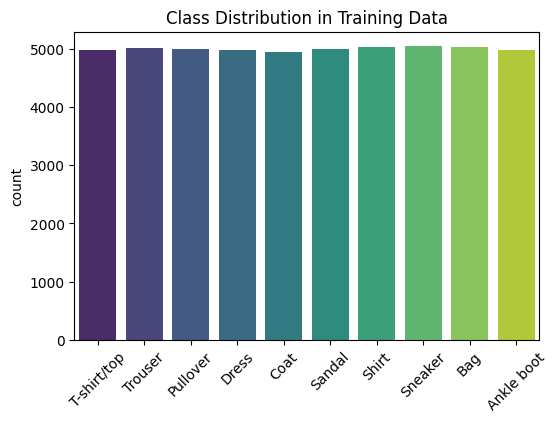

In [ ]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette="viridis")
plt.title("Class Distribution in Training Data")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

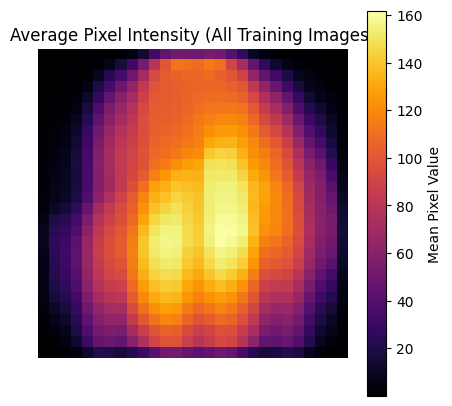

In [ ]:
# Mean Pixel Intensity Heatmap
mean_image = np.mean(x_train, axis=0)
plt.figure(figsize=(5,5))
plt.imshow(mean_image, cmap='inferno')
plt.title("Average Pixel Intensity (All Training Images)")
plt.axis('off')
plt.colorbar(label='Mean Pixel Value')
plt.show()

## Data Preprocessing

In [ ]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print("Normalization complete.")
print(f"Train pixel range: {x_train.min():.3f} to {x_train.max():.3f}")
print(f"Validation pixel range: {x_val.min():.3f} to {x_val.max():.3f}")
print(f"Test pixel range: {x_test.min():.3f} to {x_test.max():.3f}\n")
# Reshape for ANN (flattened)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_val_flat = x_val.reshape((x_val.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
print("Data reshaped for ANN (MLP).")
print(f"x_train_flat shape: {x_train_flat.shape}")
print(f"x_val_flat shape:   {x_val_flat.shape}")
print(f"x_test_flat shape:  {x_test_flat.shape}\n")
# For CNN, reshape to (28,28,1)
x_train_cnn = np.expand_dims(x_train, -1)
x_val_cnn = np.expand_dims(x_val, -1)
x_test_cnn = np.expand_dims(x_test, -1)
print("Data reshaped for CNN.")
print(f"x_train_cnn shape: {x_train_cnn.shape}")
print(f"x_val_cnn shape:   {x_val_cnn.shape}")
print(f"x_test_cnn shape:  {x_test_cnn.shape}\n")

Normalization complete.
Train pixel range: 0.000 to 1.000
Validation pixel range: 0.000 to 1.000
Test pixel range: 0.000 to 1.000

Data reshaped for ANN (MLP).
x_train_flat shape: (50000, 784)
x_val_flat shape:   (10000, 784)
x_test_flat shape:  (10000, 784)

Data reshaped for CNN.
x_train_cnn shape: (50000, 28, 28, 1)
x_val_cnn shape:   (10000, 28, 28, 1)
x_test_cnn shape:  (10000, 28, 28, 1)



## Model 1: Artificial Neural Network (ANN / MLP)

In [ ]:
# ANN MODEL
ann = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print("ANN (MLP) Architecture:")
ann.summary()

ANN (MLP) Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

### Model evaluation

In [ ]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_ann = ann.fit(x_train_flat, y_train,
                      validation_data=(x_val_flat, y_val),
                      epochs=10,
                      batch_size=128,
                      verbose=1)
# Evaluation
y_pred_ann = np.argmax(ann.predict(x_test_flat), axis=1)
acc_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Test Accuracy: {acc_ann:.4f}")
print("\nClassification Report (ANN):\n", classification_report(y_test, y_pred_ann, target_names=class_names))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7529 - loss: 0.7261 - val_accuracy: 0.8552 - val_loss: 0.4079
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8603 - loss: 0.3893 - val_accuracy: 0.8723 - val_loss: 0.3561
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8747 - loss: 0.3409 - val_accuracy: 0.8800 - val_loss: 0.3379
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8871 - loss: 0.3090 - val_accuracy: 0.8748 - val_loss: 0.3544
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8917 - loss: 0.2919 - val_accuracy: 0.8709 - val_loss: 0.3629
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8982 - loss: 0.2757 - val_accuracy: 0.8876 - val_loss: 0.3143
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9030 - loss: 0.2627 - val_accuracy: 0.8820 - val_loss: 0.3244
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9053 - loss: 0.2537 - val_accur

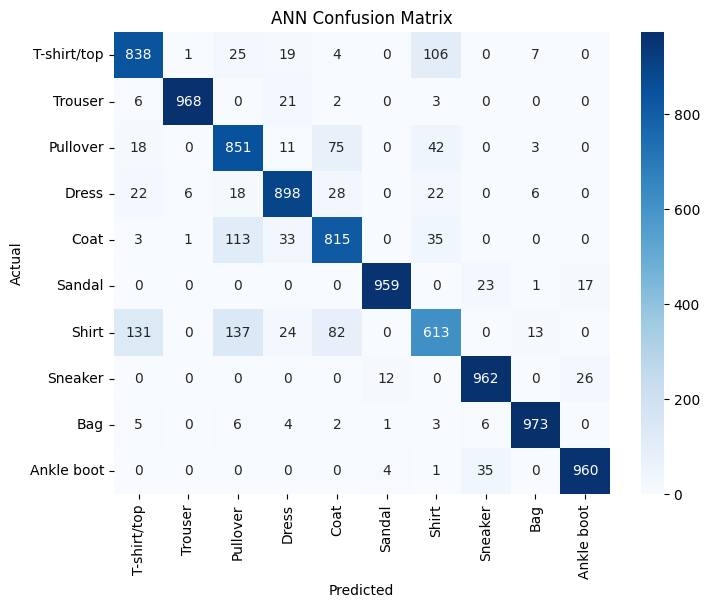

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Highlight Confusion Between Similar Classes — ANN

In [ ]:
# Generate confusion matrix for ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
# Highlight confusion between visually similar classes
similar_pairs = [('Shirt', 'Coat'), ('Pullover', 'Shirt'), ('Shirt', 'T-shirt/top')]
print("ANN - Confusions between visually similar classes:\n")
for a, b in similar_pairs:
    actual_idx = class_names.index(a)
    pred_idx = class_names.index(b)
    count = cm_ann[actual_idx, pred_idx]
    print(f"Actual '{a}' predicted as '{b}': {count} images")

ANN - Confusions between visually similar classes:

Actual 'Shirt' predicted as 'Coat': 82 images
Actual 'Pullover' predicted as 'Shirt': 42 images
Actual 'Shirt' predicted as 'T-shirt/top': 131 images


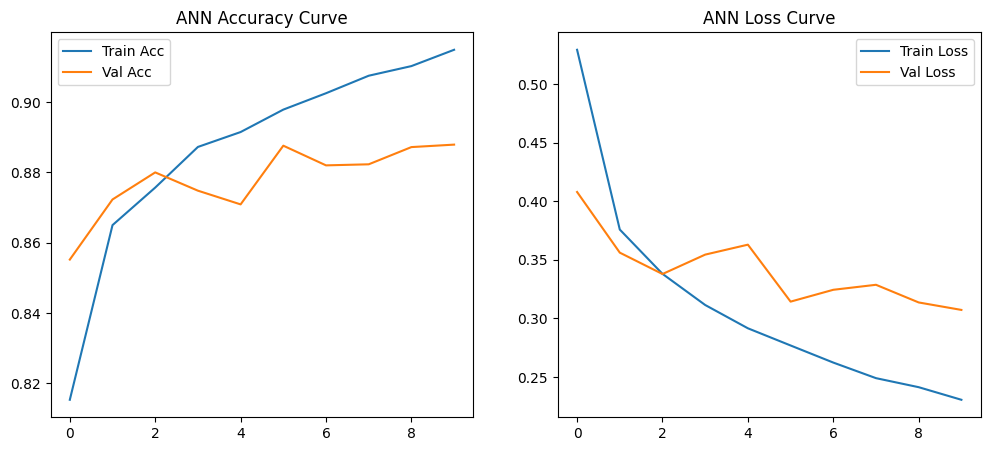

In [ ]:
# Accuracy & Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_ann.history['accuracy'], label='Train Acc')
plt.plot(history_ann.history['val_accuracy'], label='Val Acc')
plt.title("ANN Accuracy Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Val Loss')
plt.title("ANN Loss Curve")
plt.legend()
plt.show()

## Model 2: Convolutional Neural Network (CNN)

In [ ]:
# CNN MODEL
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print("CNN Architecture:")
cnn.summary()

CNN Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model evaluation

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_cnn = cnn.fit(x_train_cnn, y_train,
                      validation_data=(x_val_cnn, y_val),
                      epochs=10,
                      batch_size=128,
                      verbose=1)
# Evaluation
y_pred_cnn = np.argmax(cnn.predict(x_test_cnn), axis=1)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"CNN Test Accuracy: {acc_cnn:.4f}")
print("\nClassification Report (CNN):\n", classification_report(y_test, y_pred_cnn, target_names=class_names))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 122ms/step - accuracy: 0.6961 - loss: 0.8497 - val_accuracy: 0.8605 - val_loss: 0.3906
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 116ms/step - accuracy: 0.8656 - loss: 0.3789 - val_accuracy: 0.8720 - val_loss: 0.3524
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.8830 - loss: 0.3239 - val_accuracy: 0.8856 - val_loss: 0.3115
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 124ms/step - accuracy: 0.8939 - loss: 0.2908 - val_accuracy: 0.8934 - val_loss: 0.2938
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 112ms/step - accuracy: 0.9034 - loss: 0.2672 - val_accuracy: 0.9027 - val_loss: 0.2735
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.9119 - loss: 0.2457 - val_accuracy: 0.9012 - val_loss: 0.2669
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.9163 - loss: 0.2285 - val_accuracy: 0.9062 - val_loss: 0.2599
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.9257 - loss: 0

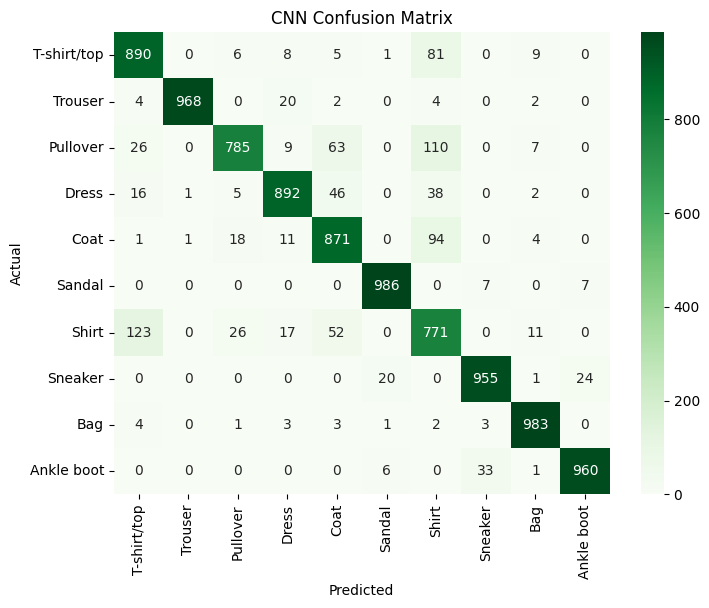

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

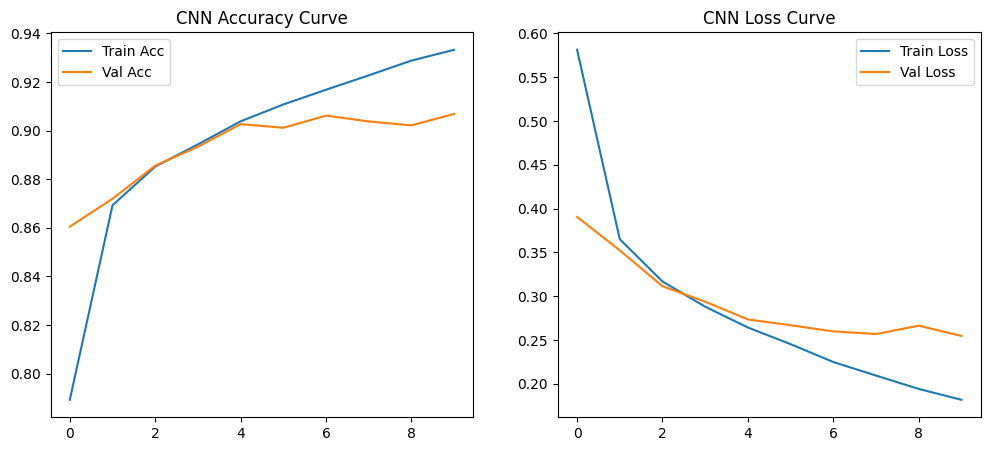

In [ ]:
# Accuracy & Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title("CNN Accuracy Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title("CNN Loss Curve")
plt.legend()
plt.show()

## Highlight Confusion Between Similar Classes — CNN

In [ ]:
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
# Highlight confusion between visually similar classes
print("CNN - Confusions between visually similar classes:\n")
for a, b in similar_pairs:
    actual_idx = class_names.index(a)
    pred_idx = class_names.index(b)
    count = cm_cnn[actual_idx, pred_idx]
    print(f"Actual '{a}' predicted as '{b}': {count} images")

CNN - Confusions between visually similar classes:

Actual 'Shirt' predicted as 'Coat': 52 images
Actual 'Pullover' predicted as 'Shirt': 110 images
Actual 'Shirt' predicted as 'T-shirt/top': 123 images


## Final Model Comparison

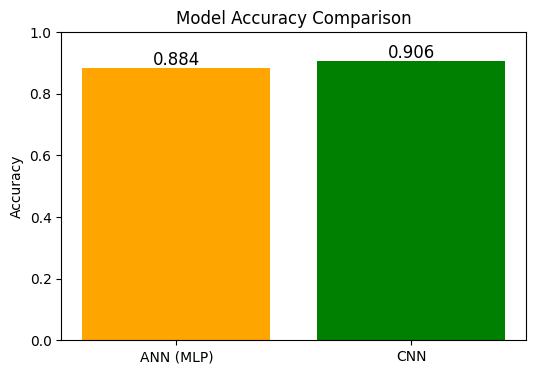

In [ ]:
# Compare Accuracy
models_list = ['ANN (MLP)', 'CNN']
accuracy_values = [acc_ann, acc_cnn]
plt.figure(figsize=(6,4))
bars = plt.bar(models_list, accuracy_values, color=['orange', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
# Add accuracy labels on top
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=12)
plt.show()